In [359]:
import numpy as np
import matplotlib.pyplot as plt

In [360]:
#  Data generate X,Y
def generatedataset(m):
    m=100
    X=np.random.randn(m)*10
    noise=np.random.randn(m)
    y=3*X+1+4*noise
    return X,y

In [361]:
X,y=generatedataset(100)

data before normalisation

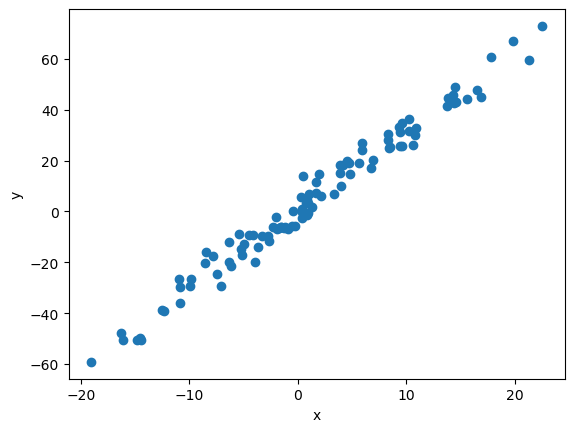

In [362]:
def plotgraph(X,y):
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(X,y)

plotgraph(X,y)

In [363]:
def normalise_data(X):
    X=(X-X.mean())/X.std()
    return X

data after noramlising the data

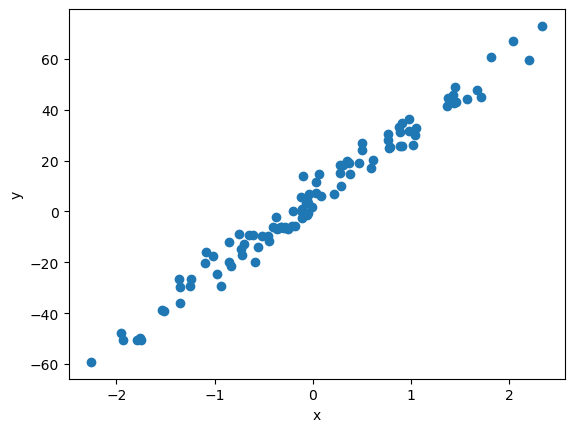

In [364]:
plotgraph(normalise_data(X),y)

In [391]:
 m=X.shape[0]
m

100

In [365]:
def traintestsplit(X,y,split=0.8):
    m=X.shape[0]
    # creating all zero matrix having 100 rows with 2 columns for test and train
    data=np.zeros((m,2))
    data[:,0]=X
    data[:,1]=y

    np.random.shuffle(data)

    split=int(m*split)

    XT=data[:split,0]
    yT=data[:split,1]
    Xt=data[split:,0]
    yt=data[split:,1]

    return XT,yT,Xt,yt


In [366]:
XT,yT,Xt,yt=traintestsplit(X,y)
print(XT.shape),
print(yT.shape),
print(Xt.shape),
print(yt.shape)

(80,)
(80,)
(20,)
(20,)


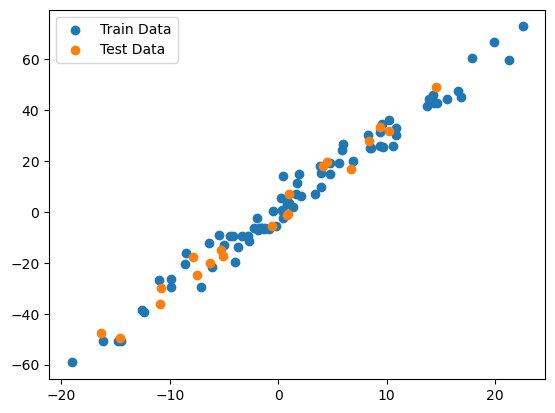

In [367]:
plt.scatter(XT,yT,label="Train Data")
plt.scatter(Xt,yt,label="Test Data")

plt.legend()
plt.show()

hypothesis function

In [368]:
# hypothesis function is equal y where y=mx+c where m and c are theta0 and theta1

def hypothesis(X,theta):
    return theta[0]+theta[1]*X


# error function is mean square error (mod error function-> square error function -> mean square error function)
def errorfunction(X,y,theta):
    m=X.shape[0]
    e=0
    for i in range(m):
        # y hat is the prediction of the of x values which is h(theta)
        y_i= hypothesis(X[i],theta)
        e=e+(y[i]-y_i)**2

    return e/(2*m)          

# gradient is used for training equation where grad[0]=del(J(theta))/del(theta0) and grad[1]= del (J(Theta))/del(theta1)

def gradient(X,y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))

    for i in range(m):
        exp=hypothesis(X[i],theta)-y[i]
        grad[0] +=(exp)
        grad[1]+=(exp)*X[i]

    return grad/m

# for training we need the training equation which is a gradient descent equation where the error should be really minimum for that the slope should be 0 
# theta(0)=theta(0)-learnrate*gradient[0]
# theta(1)=theta(1)-learnrate*gradient[1]
# learnrate is the hyperparameter

def train(X,y,learnrate=0.001, maxitrs=100):
    theta=np.zeros((2,))
    
    error_list=[]
    for i in range(maxitrs):
        grad=gradient(X,y,theta)
        error_list.append(errorfunction(X,y,theta))
        theta[0]=theta[0]-learnrate*grad[0]
        theta[1]=theta[1]-learnrate*grad[1]
        
    return theta

In [369]:
# you can see it becomes constant when the interation were 100 so it means 100 little steps to get to reach minima of error

theta=train(X,y)
theta

array([0.10499653, 3.09280867])

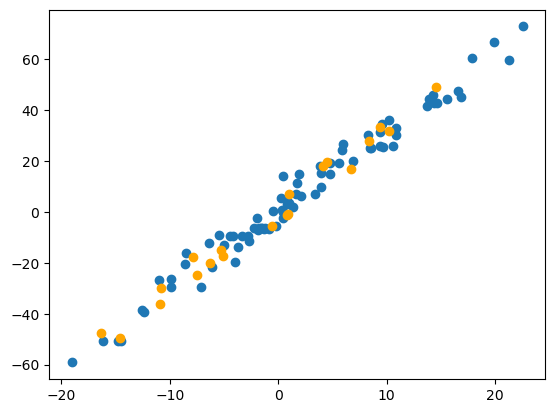

In [370]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color="orange")

In [371]:
def predict(X,theta):
    return hypothesis(X,theta)


yp=predict(Xt,theta)



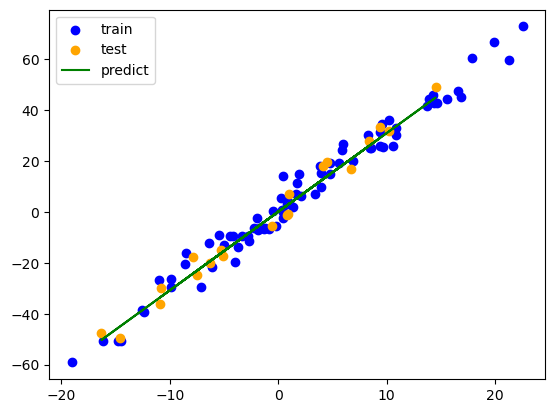

In [372]:

plt.scatter(XT,yT,color="blue",label="train")
plt.scatter(Xt,yt,color="orange",label="test")
plt.plot(Xt,yp,color="green",label="predict")
plt.legend()
plt.show()

r2 score model evaluation

In [373]:
def r2score(y,yp):
    # np.sum will automatically calculate the sum of the elements present in the vector 
    # so we don't have to iterate over all the elements
    num=np.sum((y-yp)**2)
    denom=np.sum((y-y.mean())**2)

    return 1-(num/denom)



r2score(yt,yp)





0.981943600831936